In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/minsu/Desktop/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

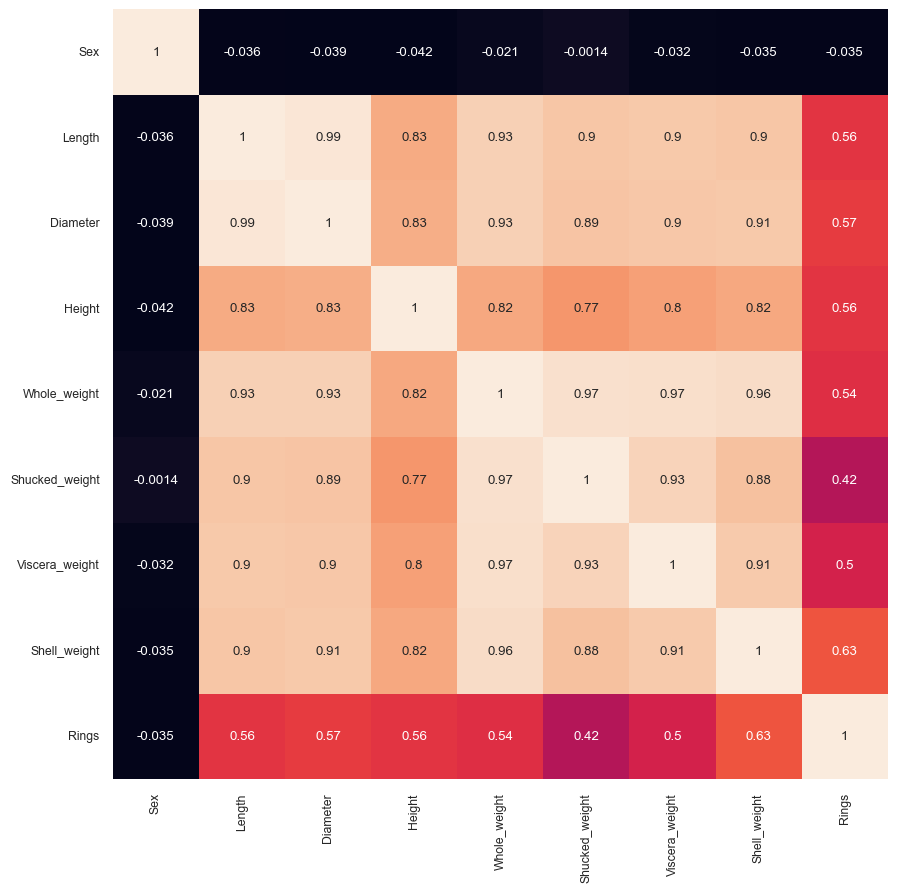

In [5]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [6]:
y = df['Rings']
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Rings', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

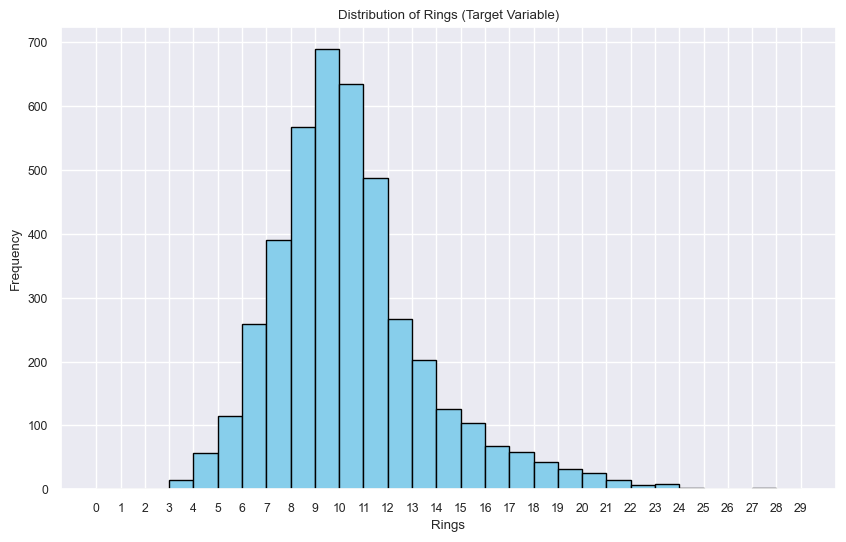

In [14]:
bins = np.arange(0, df['Rings'].max() + 1)

plt.figure(figsize=(10, 6))
plt.hist(df['Rings'], bins=bins, color='skyblue', edgecolor='black')
plt.xticks(bins)  # x축에 모든 구간 값 표시
plt.title('Distribution of Rings (Target Variable)')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input

# CNN 분류 모델 정의
model_lstm = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

In [54]:
# 데이터 차원 조정 (LSTM 입력에 맞게 reshape)
X_train_reg_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reg_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 훈련
history_lstm = model_lstm.fit(X_train_reg_reshaped, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 96.3959 - mae: 8.9957 - val_loss: 10.6816 - val_mae: 2.3406
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 10.2442 - mae: 2.2871 - val_loss: 9.7615 - val_mae: 2.1666
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.7651 - mae: 2.0841 - val_loss: 6.3252 - val_mae: 1.7575
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 7.6589 - mae: 1.9977 - val_loss: 6.2768 - val_mae: 1.8851
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 7.3496 - mae: 1.9483 - val_loss: 6.3842 - val_mae: 1.8525
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 6.9221 - mae: 1.9313 - val_loss: 7.2000 - val_mae: 2.1979
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 7.4763 - mae: 1.9894 - val_loss: 6.7056 - val_mae: 1.7504
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 7.1331 - mae: 1.9551 - val_loss: 7.0856 - val_mae: 2.1626
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 7.

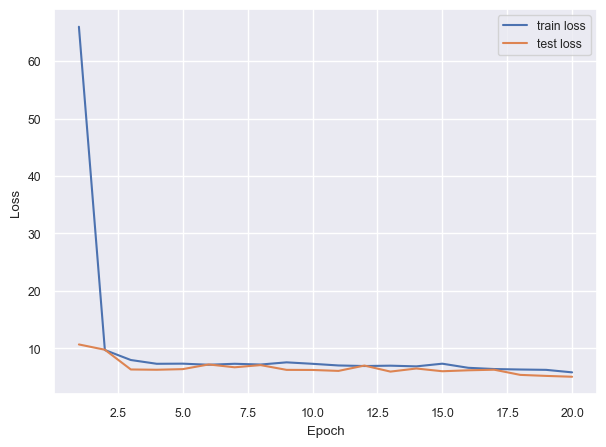

In [55]:
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

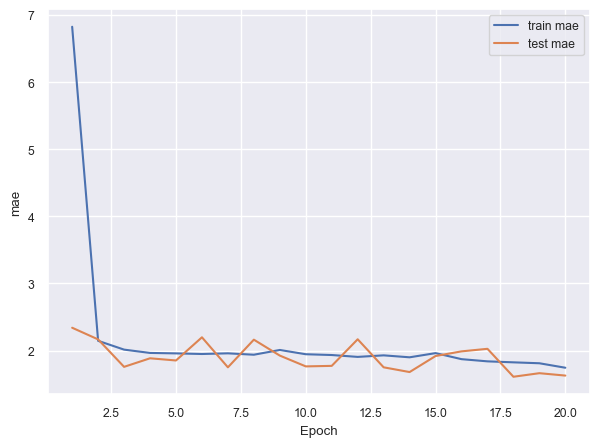

In [58]:
mae = history_lstm.history['mae']
val_mae = history_lstm.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='test mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend()
plt.show()

Test MAE에서 변동성

# Dropout 추가

In [60]:
from tensorflow.keras.layers import Dense

model_lstm = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # 입력 데이터 형태 정의
    LSTM(50, activation='relu'),         # LSTM 레이어
    Dropout(0.2),                        # 드롭아웃 추가 (비율 0.2)
    Dense(1)                             # 회귀를 위한 출력 레이어
])

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# 모델 훈련
history_lstm = model_lstm.fit(X_train_reg_reshaped, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 100.9036 - mae: 9.2483 - val_loss: 19.5122 - val_mae: 3.3498
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 18.2239 - mae: 2.9530 - val_loss: 8.1925 - val_mae: 2.0494
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 10.2431 - mae: 2.3000 - val_loss: 6.6139 - val_mae: 1.8842
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.7737 - mae: 2.1816 - val_loss: 6.3639 - val_mae: 1.8196
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 8.8012 - mae: 2.2004 - val_loss: 6.2294 - val_mae: 1.7940
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 8.5854 - mae: 2.1470 - val_loss: 6.2878 - val_mae: 1.8103
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 8.5793 - mae: 2.1531 - val_loss: 6.2350 - val_mae: 1.7058
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.6810 - mae: 2.1699 - val_loss: 6.0210 - val_mae: 1.8481
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 

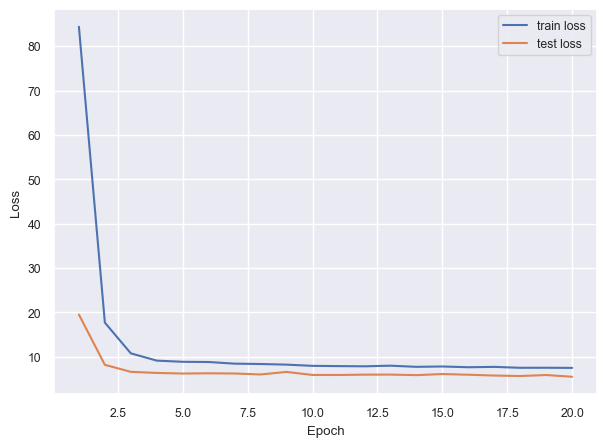

In [63]:
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

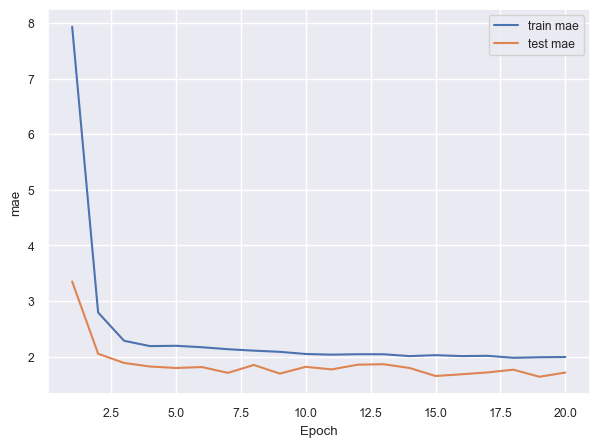

In [64]:
mae = history_lstm.history['mae']
val_mae = history_lstm.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='test mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend()
plt.show()